# Minimal examples for Sequence Models (RNNs, GRUs, LSTMs)

Example applications:
- Mapping Sequence to sequence e.g. an audio wave to a text
- Mapping any input to a sequence e.g. a random number to an audio wave in a music generator
- Mapping sequence to a class e.g. sentiment classification / text to a rating from 1 to 5 stars


## Notation
x: This is our input sentence <br>
$x^{<1>}$ = This  <br>
$x^{<2>}$ = is  <br>
...

y: Output e.g. which word is a noun    0 0 0 1 1 <br>
$y^{<3>}$ = 0  <br>
$y^{<4>}$ = 1  <br>

$T_x$ = 5 length of input <br>
$T_y$ = 5 length of output  <br>

words are represented by their position in a dictionary. If the dictionary is [a, aaron, ... input, ..., zypher] and input is at the 350th position the word can be represented by a 350 or a one hot representation with a 1 at position 350

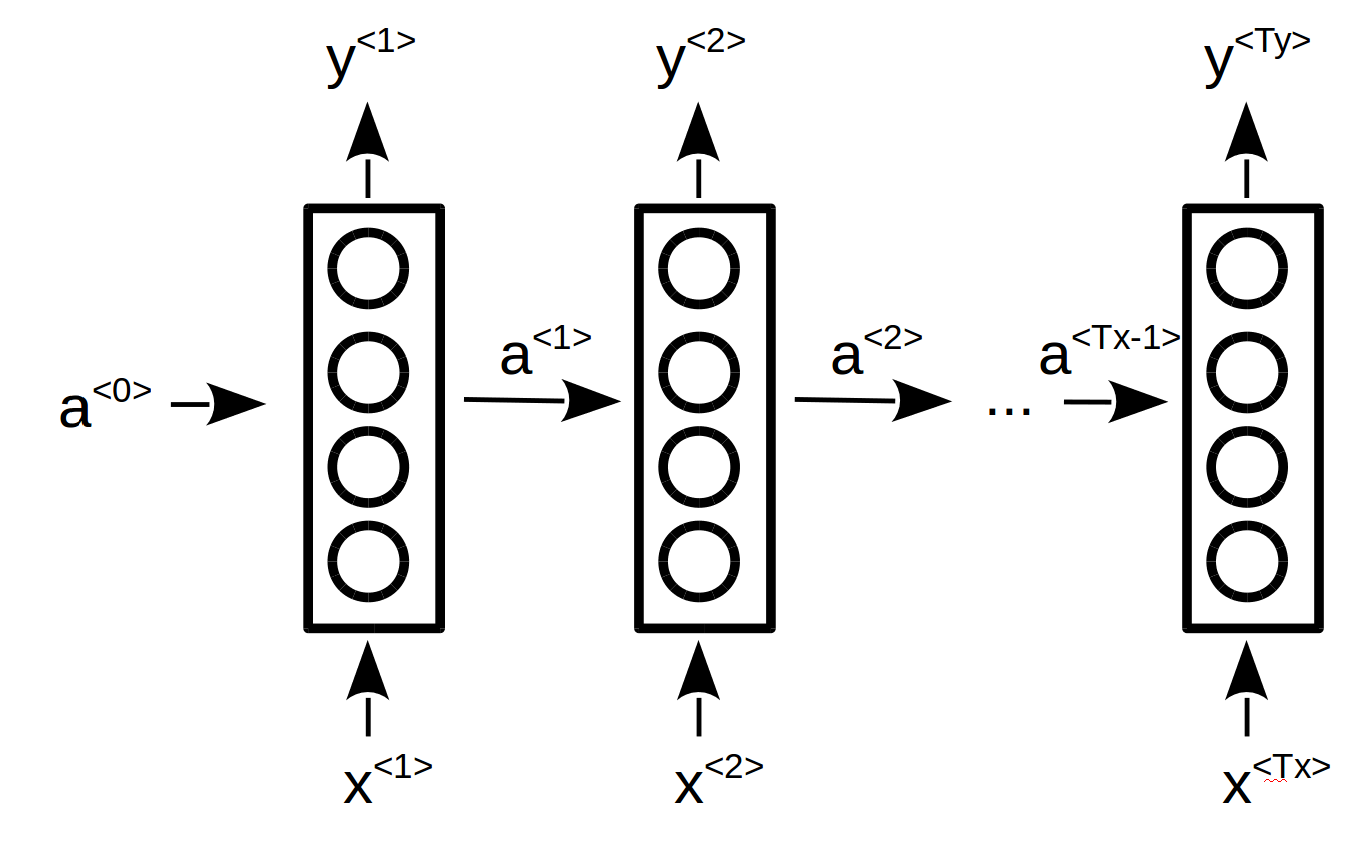

In [9]:
from IPython.display import Image
Image("imgs/rnn1.png", retina=True)

$a^{<1>} = g_1(W_{aa} a^{<0>} + W_{ax} x^{<1>} + b_a)$ <br>
$y^{<1>} = g_2(W_{ya} a^{<1>} + b_y)$ <br>

$a^{<t>} = g_1(W_{aa} a^{<t-1>} + W_{ax} x^{<t>} + b_a)$ = $g_1(W_{a} [a^{<t-1>},  x^{<t>}] + b_a)$ <br>
$y^{<t>} = g_2(W_{ya} a^{<t>} + b_y)$ <br>


the first subscript denotes what is computed and the second subscript denotes what the weight matrix is multiplied by. <br>
g is usually a tanh, or relu but other activation functions are also possible.

This is a unidirectional RNN which has the disadvantage that it only gets the words left to right but does not know which words are following. Biderectional RNNs on the other hand can utilize knowledge of the full sentence to classify each specific word.

## Backpropagation for RNNs
understand log and cross entropy
$\hat{y}$: label <br>
$L()$: loss function <br>
$L^{<t>}(y^{<t>}, \hat{y}^{<t>}) = -\hat{y} log(y^{<t>}) - (1 - \hat{y}) log(1 - y^{<t>})$ <br>
$L(y, \hat{y}) = \sum_{t=1}^{Ty} L^{<t>}(y^{<t>}, \hat{y})$

In a one-to-many architecture e.g. for music generation often $y^{<t-1>}$ is fed as the input to $x^{<t>}$

Methods against vanishing/exploding gradients: <br>
exploding gradients --> gradient clipping

## Gated Recurrent Unit (GRU)
an approach to deal with the vanishing gradient

***simplified version*** <br>
new notation: c = memory cell with $c^{<t>} = a^{<t>}$ <br>
$\widetilde{c} $ is a candidate to replace c <br>
$\widetilde{c} =tanh(W_c[c^{<t-1>}, x^{<t>}] + b_c)$ <br>
$\Gamma_u$ is a (u=update)-gate which is most of the time 1 or 0 due to the sigmoid function and decides of c gets replaced by $\widetilde{c}$<br>
$\Gamma_u = \sigma(W_u[c^{<t-1>}, x^{<t>}] + b_u)$
$c^{<t>} = \Gamma_u * \widetilde{c} + (1-\Gamma_u) * c^{<t-1>}$ <br>
$*$ = element wise multiplication

***full version*** <br>
$\Gamma_r$ = relevance of the previous c  <br>
$\Gamma_r = \sigma(W_r[c^{<t-1>}, x^{<t>}] + b_r)$  <br>

$\widetilde{c}^{<t>} =tanh(W_c[\Gamma_r * c^{<t-1>}, x^{<t>}] + b_c)$ <br>
$\Gamma_u = \sigma(W_u[c^{<t-1>}, x^{<t>}] + b_u)$  <br>
$c^{<t>} = \Gamma_u * \widetilde{c} + (1-\Gamma_u) * c^{<t-1>}$ <br>
in the literature the notation is often: <br>
$\widetilde{c}^{<t>} = \widetilde{h}$  <br>
$\Gamma_u = u$ <br>
$\Gamma_r = r$ <br>
$c^{<t>} = h$  <br>

## From GRU LSTM

In the Long Short Term Memory Architecture two seperate gates are used such that a cell does not have to decide if it either remembers or forgets but can also add to the existing memory.  <br>
c = old memory <br>
the previous activation $a^{<t-1>}$ and the new observation $x^{<t>}$ are used to calculate all gate values <br>
$\widetilde{c}$ = candidate to overwrite c: calculate new memory out of the previous activation and new observation <br>
$\Gamma_u$ = update gate: decides if the old memory c gets overwritten by $\widetilde{c}$ <br>
$\Gamma_f$ = forget gate: decides of the old memory c gets deleted <br>
$\Gamma_o$ = output gate: decides how much is outputted <br>



|   GRU                         |        LSTM        |
|---------------------------------------------------------------------------|----------------|
| <img width=300\> | <img width=300\n>|
|$\widetilde{c}^{<t>} =tanh(W_c[\Gamma_r * c^{<t-1>}, x^{<t>}] + b_c)$      |$\widetilde{c}^{<t>} =tanh(W_c[a^{<t-1>}, x^{<t>}] + b_c)$| 
|$\Gamma_u = \sigma(W_u[c^{<t-1>}, x^{<t>}] + b_u)$                         |$\Gamma_u = \sigma(W_u[a^{<t-1>}, x^{<t>}] + b_u)$ |
|$\Gamma_r = \sigma(W_r[c^{<t-1>}, x^{<t>}] + b_r)$                         |$\Gamma_f = \sigma(W_f[a^{<t-1>}, x^{<t>}] + b_f)$  |
|            |$\Gamma_o = \sigma(W_o[a^{<t-1>}, x^{<t>}] + b_o)$|
| $c^{<t>} = \Gamma_u * \widetilde{c} + (1-\Gamma_u) * c^{<t-1>}$ | $c^{<t>} = \Gamma_u * \widetilde{c}^{<t>} + \Gamma_f * c^{<t-1>}$|
|$ a^{<t>}=c^{<t>} $|$ a^{<t>} = \Gamma_o * c^{<t>} $|

$\hat{y}^{<t>}$ = softmax($\hat{a}^{<t>}$)

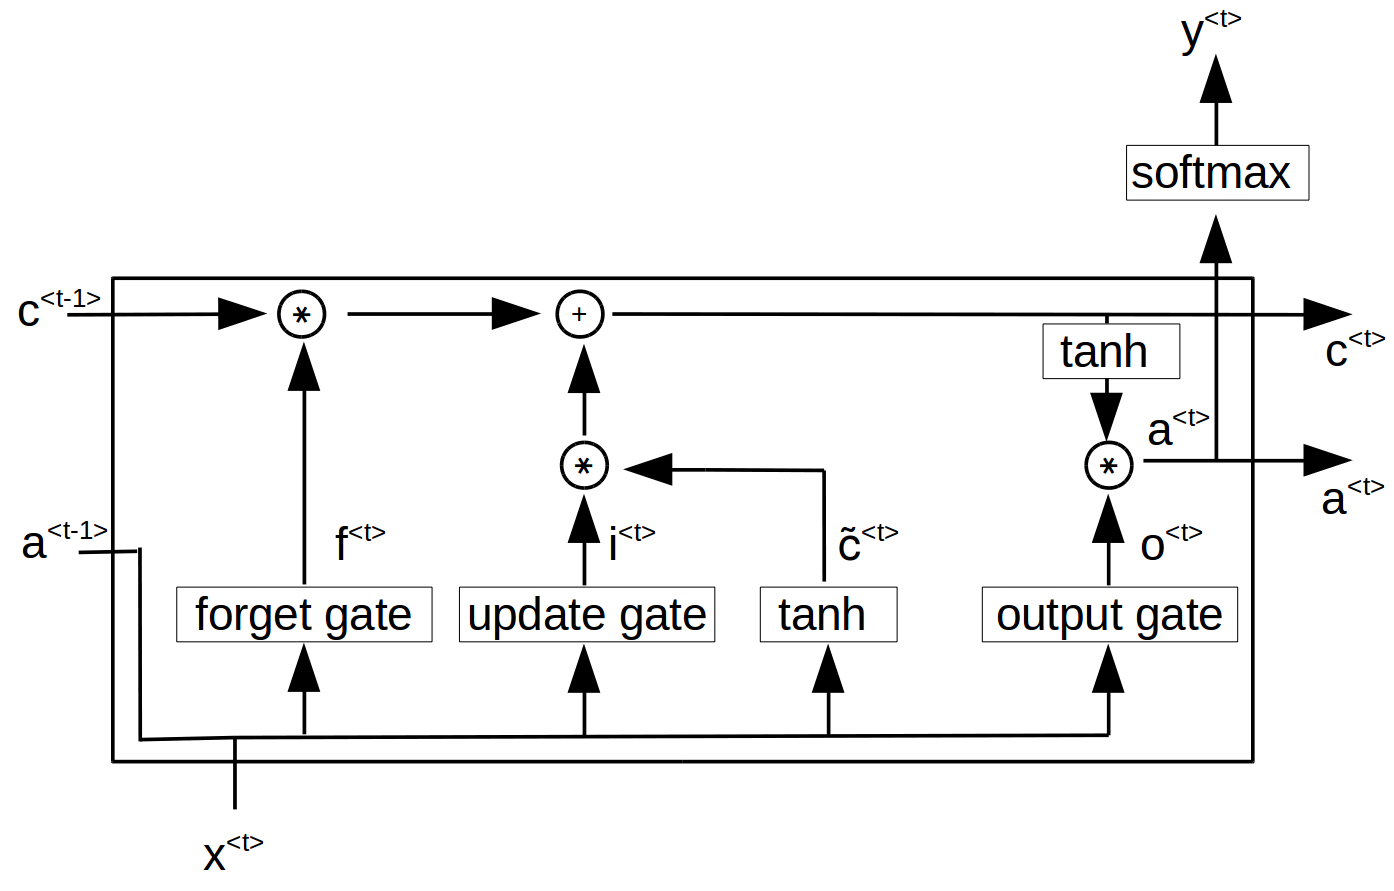

In [3]:
from IPython.display import Image
Image("imgs/lstm.png", retina=True)

If the forget gate outputs a 1 and the update gate a 0 the old memory $c^{<t-1>}$ gets just fed through to the next timestep and the old memory is preserved

## Bidirectional RNNs

Bidirectional RNNs have two paths, one RNN path feeds the inputs from left to right, the other path from right to left calculating two activations for each timestep. Afterwards both activations are appended and multiplied with the weight matrix to get y. In each block a simple RNN, GRU or LSTM can be used. this way the path with right arrows provides information from the past, the activation with a left arrow provides information from the future and x provides information from the present. Such an architecture needs the whole sequence before being able to make any predictions!

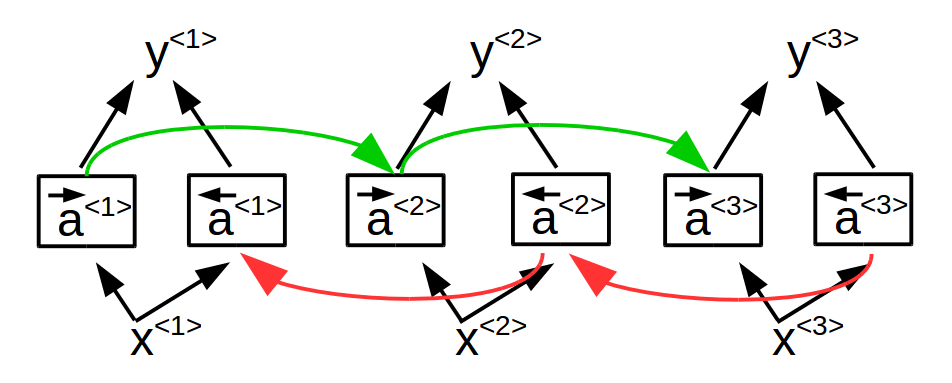

In [4]:
from IPython.display import Image
Image("imgs/brnn.png", retina=True)

$y^{<t>} = g(W_y[\overrightarrow{a}^{<t>}, \overleftarrow{a}^{<t>}] + b_y)$

## Deep RNNs

The first superscript in each RNN cell specifies the layer, the second superscript the point in time.
instead of the regular input x the y prediction of the first layer gets fed as new input while the activation of this layer at the previous timestep is the second input as show in the figure below.
Every layer has its own weight matrix.

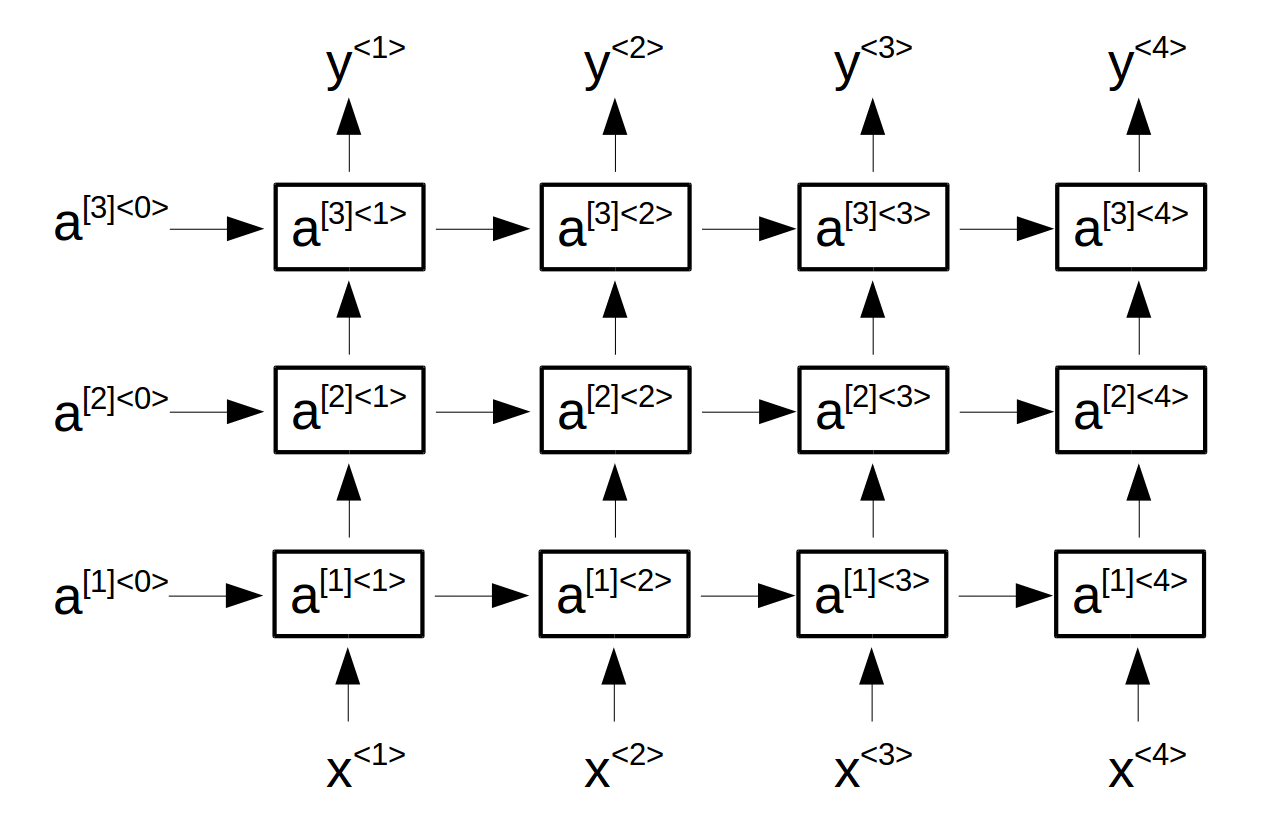

In [1]:
from IPython.display import Image
Image("imgs/drnn.png", retina=True)

e.g. $a^{[2]<3>} = g (W_a^{[2]} [a^{[2]<2>}, a^{[1]<3>}] + b_a^{[2]})$

Since the connection through time makes such a network already quite complex usually there are not many layers. One architecture which is used for more complex dependencies of the input is to stack layers on top (vertical cells and arrows) but do not feed the activation of those layers through time (no horizontal arrows).
Just like before these cells can be GRUs, LSTMs, or simple cells.